In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [3]:
data=pd.read_csv('inficterr.csv')
data0=pd.read_excel('indic.xlsx',engine='openpyxl')


In [4]:
data0.rename(columns={'Table Centrale.COM': 'COM'}, inplace=True)
data0=data0[['COM','N TL']]

In [5]:
datafin = pd.merge(data, data0, on='COM', how='left')

In [21]:
data=datafin

In [22]:
data['NTLBIN'] = data['N TL'].apply(lambda x:0 if x==0 else 1)
data=data.drop('COM',axis=1)
data=data.drop('N TL',axis=1)


In [23]:
#numerical_data = data.select_dtypes(exclude=['object'])
correlations = data.corr()['NTLBIN']
#print(correlations)
threshold = -0.3  # Remplacez par le seuil de votre choix

# Filtrer les corrélations supérieures au seuil
filtered_correlations = correlations[correlations.abs() > threshold]

# Afficher les corrélations filtrées
print("\nCorrélations supérieures à", threshold, ":")
print(filtered_correlations)


Corrélations supérieures à -0.3 :
i004_A2013     0.362454
i015_A2013     0.166284
i017_A2013     0.350540
i024_A2013     0.336886
i027_A2013     0.327560
                 ...   
i118a_A2019    0.374791
i118b_A2019    0.194228
i120a_A2019    0.200138
i120b_A2019    0.023591
NTLBIN         1.000000
Name: NTLBIN, Length: 115, dtype: float64


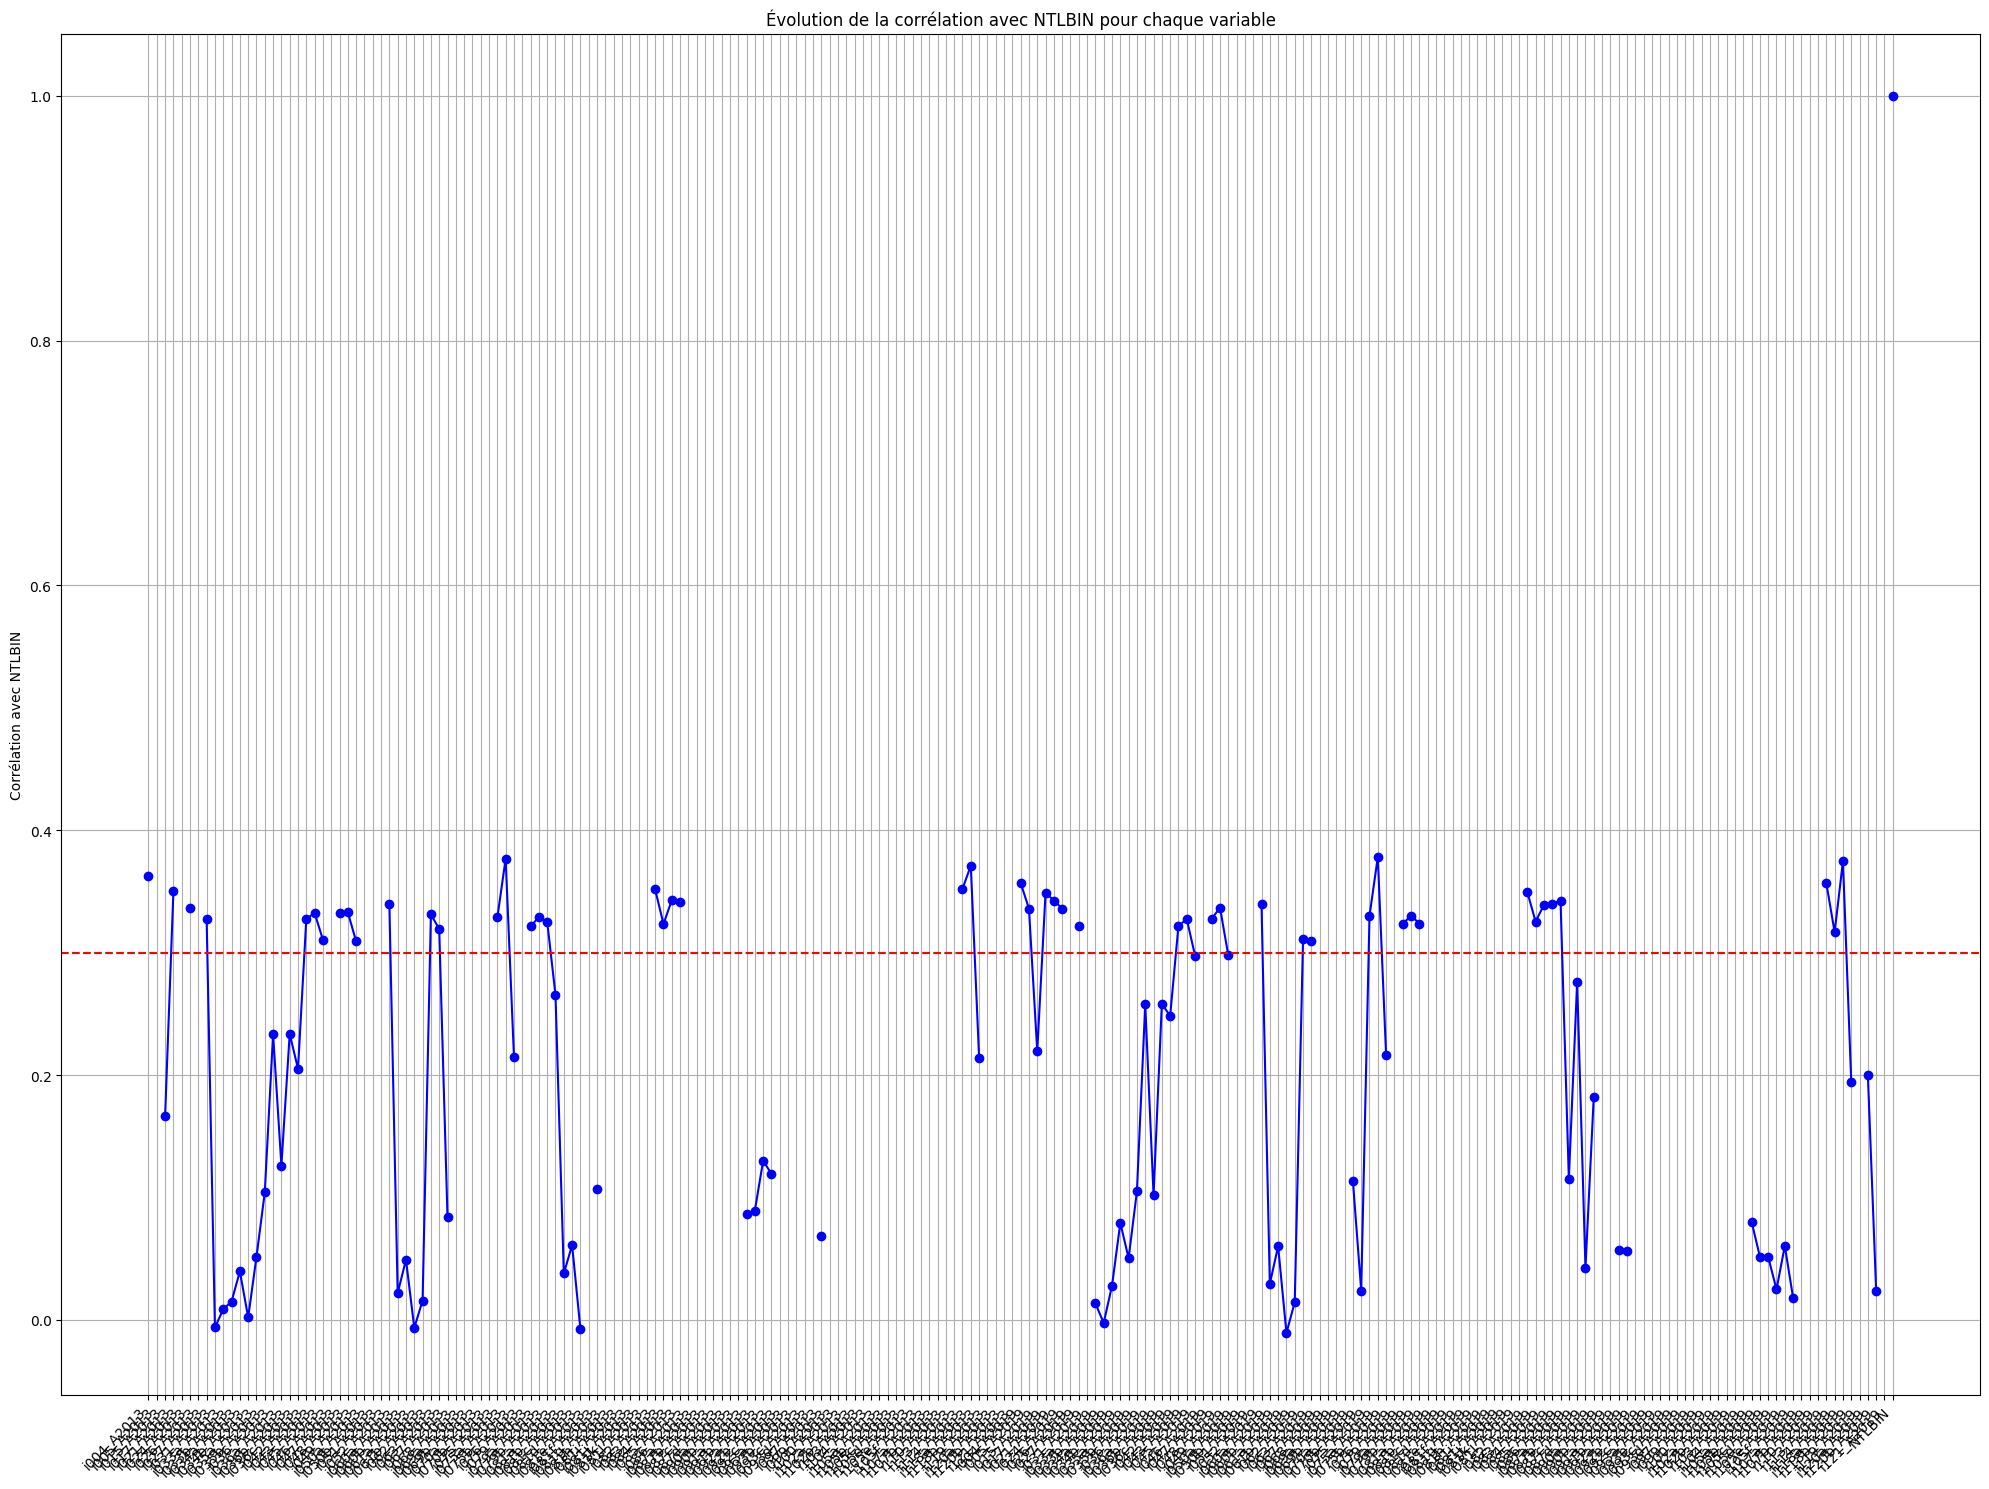

In [24]:
plt.figure(figsize=(20, 15))
plt.plot(correlations.index, correlations.values, color='blue', marker='o')
plt.axhline(y=0.3,color='r',linestyle='--')
plt.ylabel('Corrélation avec NTLBIN')
plt.title('Évolution de la corrélation avec NTLBIN pour chaque variable')
plt.grid(True)
plt.xticks(ticks=correlations.index, labels=correlations.index,ha='right',rotation=45)
plt.tight_layout()
plt.show()


In [27]:
data= data.fillna(0)

data.replace([np.inf, -np.inf], 3000, inplace=True)

In [46]:
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Définition de la fonction pour calculer le VIF
"""
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialisation de X avec vos données (en supprimant la variable cible)
X = data.drop(columns=['NTLBIN'])

# Calcul des VIF initiaux
vif_data = calculate_vif(X)
print("VIF initiaux:")
print(vif_data)
"""
# Seuil initial pour le VIF élevé
high_vif_threshold = 5



# Si le nombre de variables restantes est <= 100, supprimer une par une

while vif_data['VIF'].max() > high_vif_threshold:
    max_vif_variable = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[0]
    print(f'Suppression de la variable avec le VIF le plus élevé: {max_vif_variable}')
    X = X.drop(columns=[max_vif_variable])
    vif_data = calculate_vif(X)
    vif_data = vif_data.dropna()

    print(vif_data)

print('Variables restantes après suppression des variables à forte multicolinéarité:')
print(X.columns)


Suppression de la variable avec le VIF le plus élevé: i035a_A2019
       Variable       VIF
0    i015_A2013  1.284949
1    i031_A2013  1.034963
2   i033a_A2013  1.544300
3   i033b_A2013  1.015831
4   i034a_A2013  1.453738
5   i034b_A2013  1.016387
6   i035a_A2013  1.134305
7   i035b_A2013  1.450910
8   i036a_A2013  7.060708
9   i036b_A2013  5.469197
10  i061b_A2013  6.495358
11   i067_A2013  2.515770
12  i081a_A2013  1.617826
13  i081b_A2013  1.091906
14  i081c_A2013  1.175659
15  i081d_A2013  1.091219
16  i081f_A2013  1.278809
17  i091b_A2013  1.169568
18  i092a_A2013  5.168729
19  i092b_A2013  4.767955
20   i097_A2013  3.939162
21   i114_A2013  5.522609
22  i118b_A2013  3.387331
23   i015_A2019  1.368033
24  i033a_A2019  1.536996
25  i033b_A2019  1.016315
26  i034a_A2019  1.448820
27  i034b_A2019  1.059943
28  i036a_A2019  6.931733
29  i036c_A2019  2.585123
30  i060b_A2019  7.743503
31  i070a_A2019  2.068115
32  i070b_A2019  1.422577
33  i075b_A2019  5.781951
34  i087a_A2019  1.48156

In [47]:
len(vif_data['Variable'])

41

In [54]:
colonnes=[]
for txt in vif_data['Variable']:
    colonnes.append(txt)


X=data[colonnes]

y = data['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())



         Current function value: 0.167708
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 4309
Model:                          Logit   Df Residuals:                     4268
Method:                           MLE   Df Model:                           40
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                 0.09001
Time:                        15:48:57   Log-Likelihood:                -722.65
converged:                      False   LL-Null:                       -794.13
Covariance Type:            nonrobust   LLR p-value:                 1.708e-13
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
i015_A2013      0.1138      0.173      0.659      0.510      -0.225       0.452
i031_A2013  -3.311e-09   1.93e-09     -1.718      0.086   -7.0

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultatsa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[812  14]
 [ 26  10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       826
           1       0.42      0.28      0.33        36

    accuracy                           0.95       862
   macro avg       0.69      0.63      0.65       862
weighted avg       0.95      0.95      0.95       862


Accuracy Score:
0.9535962877030162


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


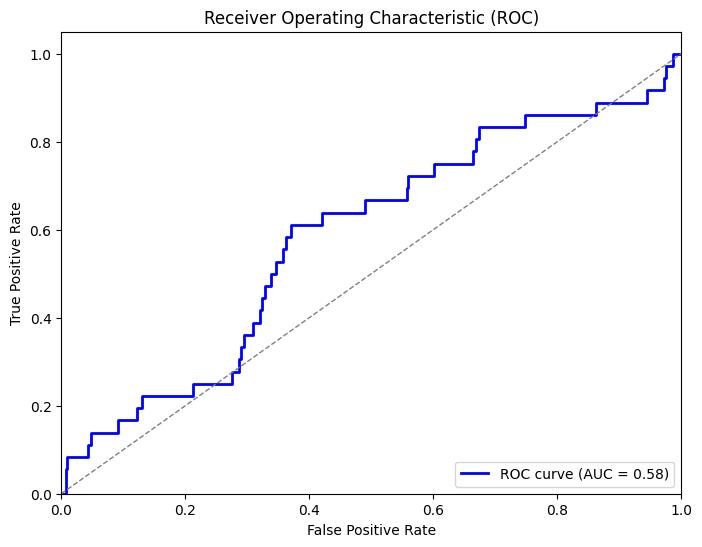

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [59]:
colonnes

['i015_A2013',
 'i031_A2013',
 'i033a_A2013',
 'i033b_A2013',
 'i034a_A2013',
 'i034b_A2013',
 'i035a_A2013',
 'i035b_A2013',
 'i061b_A2013',
 'i067_A2013',
 'i081a_A2013',
 'i081b_A2013',
 'i081c_A2013',
 'i081d_A2013',
 'i081f_A2013',
 'i091b_A2013',
 'i092b_A2013',
 'i097_A2013',
 'i114_A2013',
 'i118b_A2013',
 'i015_A2019',
 'i033a_A2019',
 'i033b_A2019',
 'i034a_A2019',
 'i034b_A2019',
 'i036a_A2019',
 'i036c_A2019',
 'i070a_A2019',
 'i070b_A2019',
 'i075b_A2019',
 'i087a_A2019',
 'i087b_A2019',
 'i087c_A2019',
 'i087d_A2019',
 'i091b_A2019',
 'i105c_A2019',
 'i105d_A2019',
 'i105e_A2019',
 'i105f_A2019',
 'i118b_A2019',
 'i120a_A2019']